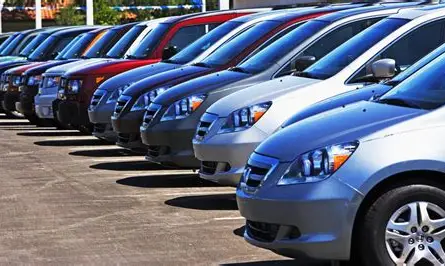

# Dataset Overview

This dataset provides information on used car sales, including key variables that capture various attributes of the cars,
such as their make, model, year of manufacture, transmission type, odometer reading, and selling price. The dataset also
contains additional details about the condition of the cars, state of sale, and more.

**Key columns in the dataset:**
- **Year**: The year the car was manufactured.
- **Make**: The brand of the car.
- **Model**: The specific model of the car.
- **Trim**: A variant or version of the model with different features.
- **Body**: The type or category of the car (e.g., SUV, Sedan).
- **Transmission**: Type of transmission (automatic or manual).
- **VIN**: Vehicle Identification Number (unique identifier for each car).
- **State**: The state where the car is sold.
- **Condition**: The condition of the car when sold (e.g., new, used).
- **Odometer**: Number of miles the car has been driven.
- **Color**: The exterior color of the car.
- **Interior**: The interior color/material of the car.
- **Seller**: The seller of the car.
- **MMR**: Manheim Market Report value (provides a price benchmark for the vehicle).
- **Selling Price**: The actual selling price of the car.
- **Sale Date**: The date the car was sold.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"https://drive.google.com/uc?export=download&id=1q33u6GkHghQUHVxkyaVALw3_pDCDDv45")

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [ ]:
df.count()

,0
year,558837
make,548536
model,548438
trim,548186
body,545642
transmission,493485
vin,558833
state,558837
condition,547017
odometer,558743


In [ ]:
df.shape

(558837, 16)

In [ ]:
df.columns= df.columns.str.strip().str.lower()

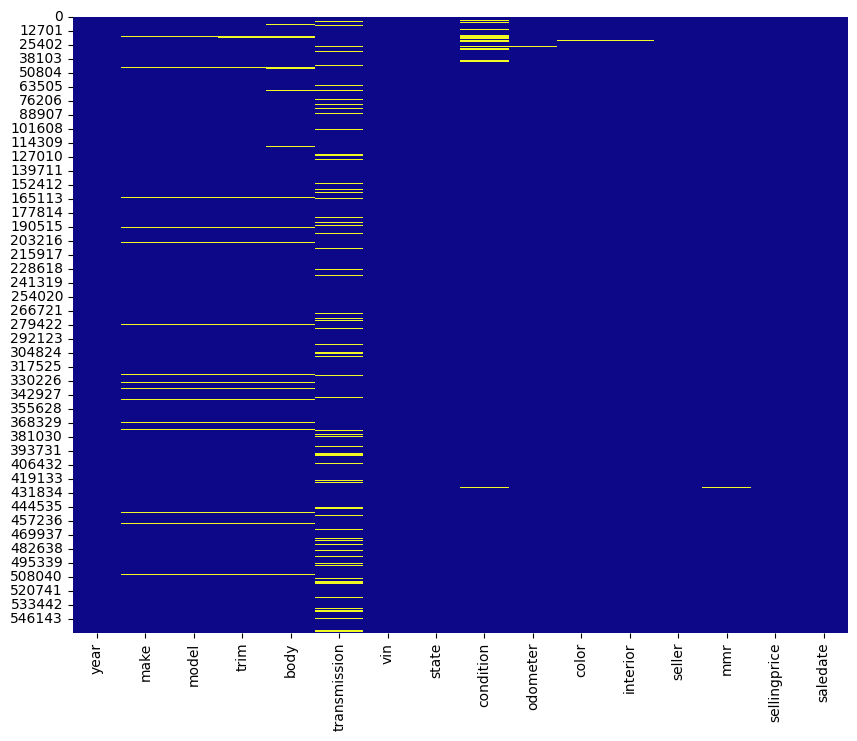

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False, cmap='plasma')
plt.show()

In [ ]:
df.nunique()

,0
year,34
make,96
model,973
trim,1963
body,87
transmission,4
vin,550297
state,64
condition,41
odometer,172278


In [ ]:
df.isnull().mean() * 100

,0
year,0.000000
make,1.843292
model,1.860829
trim,1.905922
body,2.361154
transmission,11.694287
vin,0.000716
state,0.000000
condition,2.115107
odometer,0.016821


In [ ]:
fill_methods = ['make','model','trim','body','transmission']
for coloumn in fill_methods:
    df[coloumn].fillna(df[coloumn].mode()[0], inplace=True)

In [ ]:
df.isnull().mean() * 100

,0
year,0.000000
make,0.000000
model,0.000000
trim,0.000000
body,0.000000
transmission,0.000000
vin,0.000716
state,0.000000
condition,2.115107
odometer,0.016821


In [ ]:
df.drop('vin', axis=1, inplace=True)

In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
drop_rows = ['saledate', 'sellingprice','mmr','seller','interior','color','odometer','condition']
df = df.dropna(subset=drop_rows)

In [ ]:
df.isnull().mean() * 100

,0
year,0.0
make,0.0
model,0.0
trim,0.0
body,0.0
transmission,0.0
state,0.0
condition,0.0
odometer,0.0
color,0.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(546325, 15)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,546325.0,2010.132280,3.906608,1982.0,2008.0,2012.0,2013.0,2015.0
condition,546325.0,30.669557,13.400986,1.0,23.0,35.0,42.0,49.0
odometer,546325.0,67289.743418,52781.847842,1.0,28072.0,51260.0,97438.0,999999.0
mmr,546325.0,13903.192697,9652.965754,25.0,7375.0,12400.0,18400.0,182000.0
sellingprice,546325.0,13751.715761,9724.318611,1.0,7100.0,12300.0,18300.0,230000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546325 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          546325 non-null  int64  
 1   make          546325 non-null  object 
 2   model         546325 non-null  object 
 3   trim          546325 non-null  object 
 4   body          546325 non-null  object 
 5   transmission  546325 non-null  object 
 6   state         546325 non-null  object 
 7   condition     546325 non-null  float64
 8   odometer      546325 non-null  float64
 9   color         546325 non-null  object 
 10  interior      546325 non-null  object 
 11  seller        546325 non-null  object 
 12  mmr           546325 non-null  float64
 13  sellingprice  546325 non-null  float64
 14  saledate      546325 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 66.7+ MB


# Feature Engineering

In [ ]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)

In [ ]:
df['saledate_year'] = df['saledate'].dt.year
df['saledate_month'] = df['saledate'].dt.month
df['saledate_day'] = df['saledate'].dt.day

In [ ]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'saledate_year', 'saledate_month',
       'saledate_day'],
      dtype='object')

In [ ]:
df.condition.unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 36.,
       35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

<Axes: xlabel='condition', ylabel='sellingprice'>

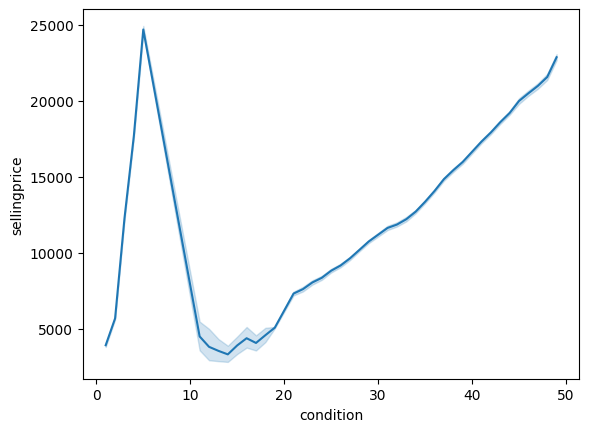

In [ ]:
sns.lineplot(data=df , x='condition', y='sellingprice')

In [ ]:
def unify (x):
  if 1 <= x <= 5:
    return int(x)
  elif 10 <= x <= 50:
    return int(round(x/10))

In [ ]:
df['condition'] = df['condition'].apply(unify)

In [ ]:
df.condition.unique()

array([5, 4, 1, 3, 2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546325 entries, 0 to 558836
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   year            546325 non-null  int64              
 1   make            546325 non-null  object             
 2   model           546325 non-null  object             
 3   trim            546325 non-null  object             
 4   body            546325 non-null  object             
 5   transmission    546325 non-null  object             
 6   state           546325 non-null  object             
 7   condition       546325 non-null  int64              
 8   odometer        546325 non-null  float64            
 9   color           546325 non-null  object             
 10  interior        546325 non-null  object             
 11  seller          546325 non-null  object             
 12  mmr             546325 non-null  float64            
 13  sellingprice    546

In [ ]:
df.head(10)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate_year,saledate_month,saledate_day
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015,1,14
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015,1,28
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014,12,18
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,ca,1,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2014-12-30 04:00:00+00:00,2014,12,30
6,2014,BMW,M5,Base,Sedan,automatic,ca,3,14943.0,black,black,the hertz corporation,69000.0,65000.0,2014-12-17 04:30:00+00:00,2014,12,17
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,ca,2,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,2014-12-16 05:00:00+00:00,2014,12,16
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,ca,4,9557.0,white,black,audi mission viejo,32100.0,32250.0,2014-12-18 04:00:00+00:00,2014,12,18
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,ca,3,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,2015-01-19 20:00:00+00:00,2015,1,19


In [ ]:
df.state.unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'oh', 'mi', 'ga', 'va', 'sc', 'in', 'il', 'co', 'ut', 'mo', 'nv',
       'ma', 'pr', 'nc', 'ny', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [ ]:
df.condition.value_counts()

,count
condition,
4,244240
3,124265
2,109184
5,60894
1,7742


In [ ]:
state_map = {
    "ca": "California",
    "tx": "Texas",
    "pa": "Pennsylvania",
    "mn": "Minnesota",
    "az": "Arizona",
    "wi": "Wisconsin",
    "tn": "Tennessee",
    "md": "Maryland",
    "fl": "Florida",
    "ne": "Nebraska",
    "nj": "New Jersey",
    "oh": "Ohio",
    "mi": "Michigan",
    "ga": "Georgia",
    "va": "Virginia",
    "sc": "South Carolina",
    "in": "Indiana",
    "il": "Illinois",
    "co": "Colorado",
    "ut": "Utah",
    "mo": "Missouri",
    "nv": "Nevada",
    "ma": "Massachusetts",
    "pr": "Puerto Rico",
    "nc": "North Carolina",
    "ny": "New York",
    "or": "Oregon",
    "la": "Louisiana",
    "wa": "Washington",
    "hi": "Hawaii",
    "qc": "Quebec",
    "ab": "Alberta",
    "on": "Ontario",
    "ok": "Oklahoma",
    "ms": "Mississippi",
    "nm": "New Mexico",
    "al": "Alabama",
    "ns": "Nova Scotia"
}
df['state'] = df['state'].map(state_map)

In [ ]:
df.state.unique()

array(['California', 'Texas', 'Pennsylvania', 'Minnesota', 'Arizona',
       'Wisconsin', 'Tennessee', 'Maryland', 'Florida', 'Nebraska',
       'New Jersey', 'Ohio', 'Michigan', 'Georgia', 'Virginia',
       'South Carolina', 'Indiana', 'Illinois', 'Colorado', 'Utah',
       'Missouri', 'Nevada', 'Massachusetts', 'Puerto Rico',
       'North Carolina', 'New York', 'Oregon', 'Louisiana', 'Washington',
       'Hawaii', 'Quebec', 'Alberta', 'Ontario', 'Oklahoma',
       'Mississippi', 'New Mexico', 'Alabama', 'Nova Scotia'],
      dtype=object)

In [ ]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate_year,saledate_month,saledate_day
0,2015,Kia,Sorento,LX,SUV,automatic,California,5,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
1,2015,Kia,Sorento,LX,SUV,automatic,California,5,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,California,4,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015,1,14
3,2015,Volvo,S60,T5,Sedan,automatic,California,4,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015,1,28
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,California,4,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014,12,18


In [ ]:
# def outliers_handling(x, p1=0.25, p2=0.75):
#     q1 = x.quantile(p1)
#     q3 = x.quantile(p2)
#     iqr = q3 - q1
#     min_limit = q1 - 1.5 * iqr
#     max_limit = q3 + 1.5 * iqr
#     return x[(x > min_limit) & (x < max_limit)]

In [ ]:
# for col in ['odometer','mmr','sellingprice']:
#     df[col] = outliers_handling(df[col])

In [ ]:
def iqr_clip(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return series.clip(lower=lower, upper=upper)

In [ ]:
df['odometer'] = iqr_clip(df['odometer'], factor=1.5)

In [ ]:
df['sellingprice'] = iqr_clip(df['sellingprice'], factor=3.0)

In [ ]:
df[['odometer', 'sellingprice']].describe()

,odometer,sellingprice
count,546325.000000,546325.000000
mean,66504.371746,13667.855985
std,49409.269453,9221.227975
min,1.000000,1.000000
25%,28072.000000,7100.000000
50%,51260.000000,12300.000000
75%,97438.000000,18300.000000
max,201487.000000,51900.000000


In [ ]:
Categorical_col = df.select_dtypes(include= 'object').columns
df[Categorical_col] = df[Categorical_col].apply(lambda col: col.str.upper())

In [ ]:
df.seller.nunique()

12958

In [ ]:
df.seller.unique()

array(['KIA MOTORS AMERICA  INC',
       'FINANCIAL SERVICES REMARKETING (LEASE)',
       'VOLVO NA REP/WORLD OMNI', ..., 'MASERATI NORTH AMERICA INC',
       'ALTERNATIVE FINANCIAL GROUP INC', 'I -5 UHLMANN RV'], dtype=object)

In [ ]:
import re

def normalize(text):
    text = text.upper()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [ ]:
df["seller"] = df["seller"].apply(normalize)

In [ ]:
df.seller.nunique()

12914

In [ ]:
df.color.unique()

array(['WHITE', 'GRAY', 'BLACK', 'RED', 'SILVER', 'BROWN', 'BEIGE',
       'BLUE', 'PURPLE', 'BURGUNDY', '—', 'GOLD', 'YELLOW', 'GREEN',
       'CHARCOAL', 'ORANGE', 'OFF-WHITE', 'TURQUOISE', 'PINK', 'LIME'],
      dtype=object)

In [ ]:
df.interior.unique()

array(['BLACK', 'BEIGE', 'TAN', 'BROWN', 'GRAY', '—', 'BURGUNDY', 'WHITE',
       'SILVER', 'OFF-WHITE', 'BLUE', 'RED', 'YELLOW', 'GREEN', 'PURPLE',
       'ORANGE', 'GOLD'], dtype=object)

In [ ]:
columns_with_weird_values = ['color', 'interior']
for column in columns_with_weird_values:
    weird_rows_count = df[df[column] == '—'].shape[0]
    total_rows = df.shape[0]
    percentage_weird_rows = (weird_rows_count / total_rows) * 100

    print(f'Column: {column}')
    print(f'Weird rows count: {weird_rows_count}')
    print(f'Percentage of weird rows: {percentage_weird_rows:.2f}%\n')

Column: color
Weird rows count: 24614
Percentage of weird rows: 4.51%

Column: interior
Weird rows count: 11844
Percentage of weird rows: 2.17%



In [ ]:
for col in ['color', 'interior']:
    most_common_value = df[col].mode()[0]
    df[col] = df[col].replace('—', most_common_value)
    weird_rows_count = df[df[col] == '—'].shape[0]
    percentage_weird_rows = (weird_rows_count / df.shape[0]) * 100
    print(f"Percentage of rows with weird '{col}' values after replacement: {percentage_weird_rows:.2f}%")

Percentage of rows with weird 'color' values after replacement: 0.00%
Percentage of rows with weird 'interior' values after replacement: 0.00%


In [ ]:
df.isnull().mean()*100

,0
year,0.0
make,0.0
model,0.0
trim,0.0
body,0.0
transmission,0.0
state,0.0
condition,0.0
odometer,0.0
color,0.0


In [ ]:
# df["odometer"].fillna(df["odometer"].median(), inplace=True)
# # df["mmr"].fillna(df["mmr"].median(), inplace=True)
# df["sellingprice"].fillna(df["sellingprice"].median(), inplace=True)

In [ ]:
df.columns.tolist()

['year',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'seller',
 'mmr',
 'sellingprice',
 'saledate',
 'saledate_year',
 'saledate_month',
 'saledate_day']

In [ ]:
df.to_csv('cleaned_data.csv',index=False)

In [ ]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate_year,saledate_month,saledate_day
0,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5,16639.0,WHITE,BLACK,KIA MOTORS AMERICA INC,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
1,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5,9393.0,WHITE,BEIGE,KIA MOTORS AMERICA INC,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,CALIFORNIA,4,1331.0,GRAY,BLACK,FINANCIAL SERVICES REMARKETING LEASE,31900.0,30000.0,2015-01-14 20:30:00+00:00,2015,1,14
3,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,CALIFORNIA,4,14282.0,WHITE,BLACK,VOLVO NA REP WORLD OMNI,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015,1,28
4,2014,BMW,6 SERIES GRAN COUPE,650I,SEDAN,AUTOMATIC,CALIFORNIA,4,2641.0,GRAY,BLACK,FINANCIAL SERVICES REMARKETING LEASE,66000.0,51900.0,2014-12-18 04:30:00+00:00,2014,12,18


In [ ]:
df.make.unique()

array(['KIA', 'BMW', 'VOLVO', 'NISSAN', 'CHEVROLET', 'AUDI', 'FORD',
       'BUICK', 'CADILLAC', 'ACURA', 'LEXUS', 'HYUNDAI', 'INFINITI',
       'JEEP', 'MERCEDES-BENZ', 'MITSUBISHI', 'MAZDA', 'MINI',
       'LAND ROVER', 'LINCOLN', 'JAGUAR', 'VOLKSWAGEN', 'TOYOTA',
       'SUBARU', 'SCION', 'PORSCHE', 'DODGE', 'FIAT', 'CHRYSLER',
       'FERRARI', 'HONDA', 'GMC', 'RAM', 'SMART', 'BENTLEY', 'PONTIAC',
       'SATURN', 'MASERATI', 'MERCURY', 'HUMMER', 'LANDROVER', 'MERCEDES',
       'SAAB', 'SUZUKI', 'OLDSMOBILE', 'DODGE TK', 'GEO', 'ROLLS-ROYCE',
       'ISUZU', 'FORD TK', 'PLYMOUTH', 'VW', 'FORD TRUCK', 'TESLA',
       'AIRSTREAM', 'DOT', 'GMC TRUCK', 'ASTON MARTIN', 'MERCEDES-B',
       'FISKER', 'DAEWOO', 'LAMBORGHINI', 'LOTUS'], dtype=object)

In [ ]:
df.model.unique()

array(['SORENTO', '3 SERIES', 'S60', '6 SERIES GRAN COUPE', 'ALTIMA',
       'M5', 'CRUZE', 'A4', 'CAMARO', 'A6', 'OPTIMA', 'FUSION', 'Q5',
       '6 SERIES', 'IMPALA', '5 SERIES', 'A3', 'XC70', 'SQ5', 'S5',
       'VERANO', 'SUBURBAN', 'ELR', 'V60', 'X6', 'ILX', 'K900', 'MALIBU',
       'RX 350', 'VERSA', 'ELANTRA', 'VERSA NOTE', 'A8', 'X1', 'ENCLAVE',
       'TTS', '4 SERIES', 'SILVERADO 2500HD', 'MDX', 'SILVERADO 1500',
       'SRX', 'X5', 'G COUPE', 'G SEDAN', 'FX', 'SANTA FE', 'GENESIS',
       'EQUUS', 'SONATA', 'SONATA HYBRID', 'ACCENT', 'VELOSTER',
       'ELANTRA COUPE', 'AZERA', 'TUCSON', 'GENESIS COUPE', 'WRANGLER',
       'S-CLASS', 'GS 350', 'OUTLANDER', 'C-CLASS', 'MAZDA2', 'RIO', 'M',
       '370Z', 'SOUL', 'OUTLANDER SPORT', 'SLK-CLASS', 'ES 350',
       'E-CLASS', 'MAZDA3', 'COOPER CLUBMAN', 'COOPER', 'CX-9', 'FORTE',
       'COMPASS', 'JX', 'LR4', 'MAZDA5', 'RANGE ROVER EVOQUE', 'LS 460',
       'GLK-CLASS', 'SPORTAGE', 'GRAND CHEROKEE', 'MKX', 'MKT', 'XF',
       'GL

In [ ]:
df.trim.unique().tolist()

['LX',
 '328I SULEV',
 'T5',
 '650I',
 '2.5 S',
 'BASE',
 '1LT',
 '2.0T PREMIUM PLUS QUATTRO',
 'LT',
 '3.0T PRESTIGE QUATTRO',
 'SE',
 'LS',
 'LTZ',
 '528I',
 '1.8 TFSI PREMIUM',
 'T6',
 '3.0T PREMIUM PLUS QUATTRO',
 'PREMIUM PLUS QUATTRO',
 'CONVENIENCE GROUP',
 'XDRIVE35I',
 '2LT',
 'TECHNOLOGY PACKAGE',
 'LUXURY',
 '1.6 SL',
 '1.6 SV',
 'L 3.0T QUATTRO',
 'SDRIVE28I',
 '750LI',
 'LEATHER GROUP',
 'QUATTRO',
 '428I SULEV',
 'WORK TRUCK',
 'ADVANCE AND ENTERTAINMENT PACKAGES',
 '535D',
 'G37 SPORT',
 'G37 JOURNEY',
 'FX37',
 'LIMITED',
 '5.0 R-SPEC',
 'SIGNATURE',
 'GLS',
 'SPORT',
 'SPORT 2.0T',
 'TURBO',
 'GS',
 'ULTIMATE',
 '3.8',
 '3.8 TRACK',
 'UNLIMITED RUBICON',
 'EX HYBRID',
 '2.5',
 'S550',
 'C250',
 'SX',
 'UNLIMITED SAHARA',
 'C250 SPORT',
 'TOURING',
 'M37',
 '+',
 'LE',
 'SLK350',
 'E350 SPORT',
 'I SV',
 'LATITUDE',
 'I TOURING',
 'JX35',
 'G37X',
 'HSE LUX',
 'EX',
 'I SPORT',
 'PURE PLUS',
 'L',
 'GLK350',
 'UNLIMITED SPORT',
 'E350 SPORT BLUETEC',
 'AWD V6',
 'GL450 

In [ ]:
df.body.unique()

array(['SUV', 'SEDAN', 'CONVERTIBLE', 'COUPE', 'WAGON', 'HATCHBACK',
       'CREW CAB', 'G COUPE', 'G SEDAN', 'ELANTRA COUPE', 'GENESIS COUPE',
       'MINIVAN', 'VAN', 'DOUBLE CAB', 'CREWMAX CAB', 'ACCESS CAB',
       'KING CAB', 'SUPERCREW', 'CTS COUPE', 'EXTENDED CAB',
       'E-SERIES VAN', 'SUPERCAB', 'REGULAR CAB', 'G CONVERTIBLE', 'KOUP',
       'QUAD CAB', 'CTS-V COUPE', 'G37 CONVERTIBLE', 'CLUB CAB',
       'XTRACAB', 'Q60 CONVERTIBLE', 'CTS WAGON', 'G37 COUPE', 'MEGA CAB',
       'CAB PLUS 4', 'Q60 COUPE', 'BEETLE CONVERTIBLE', 'TSX SPORT WAGON',
       'PROMASTER CARGO VAN', 'CAB PLUS', 'GRANTURISMO CONVERTIBLE',
       'CTS-V WAGON', 'RAM VAN', 'TRANSIT VAN', 'REGULAR-CAB'],
      dtype=object)

# Visualizations

## Univariante Analysis

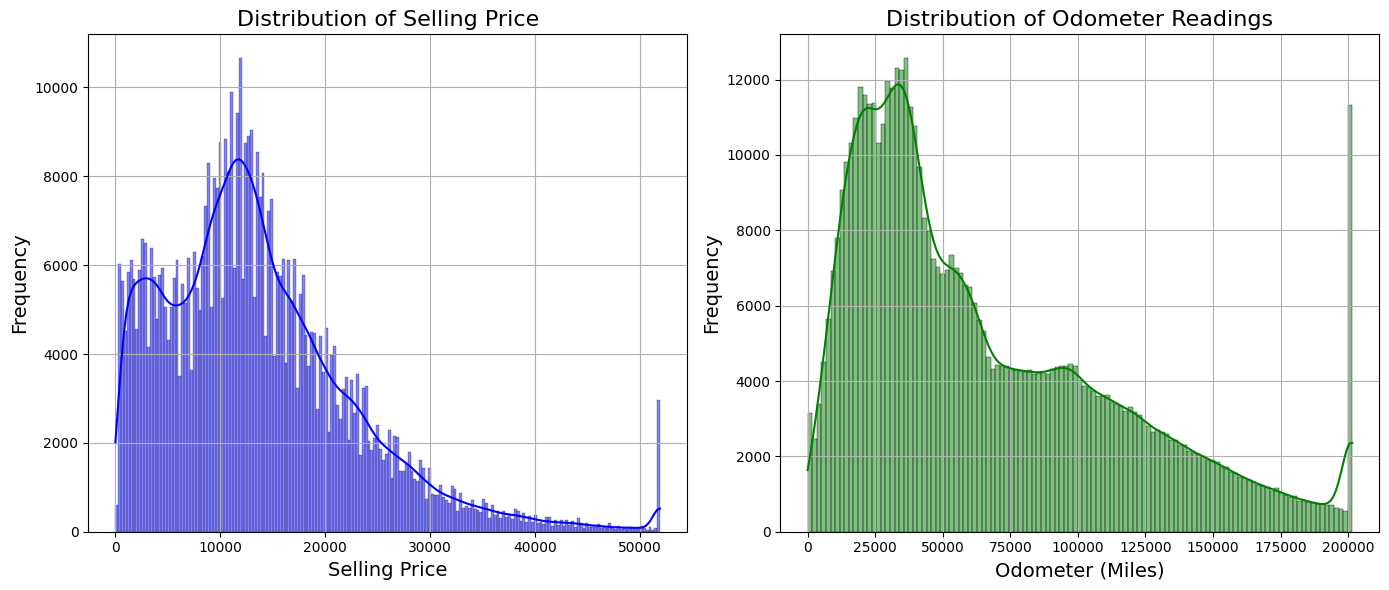

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['sellingprice'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Selling Price', fontsize=16)
axes[0].set_xlabel('Selling Price', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].grid(True)
sns.histplot(df['odometer'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Odometer Readings', fontsize=16)
axes[1].set_xlabel('Odometer (Miles)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True)

plt.tight_layout()

plt.show()

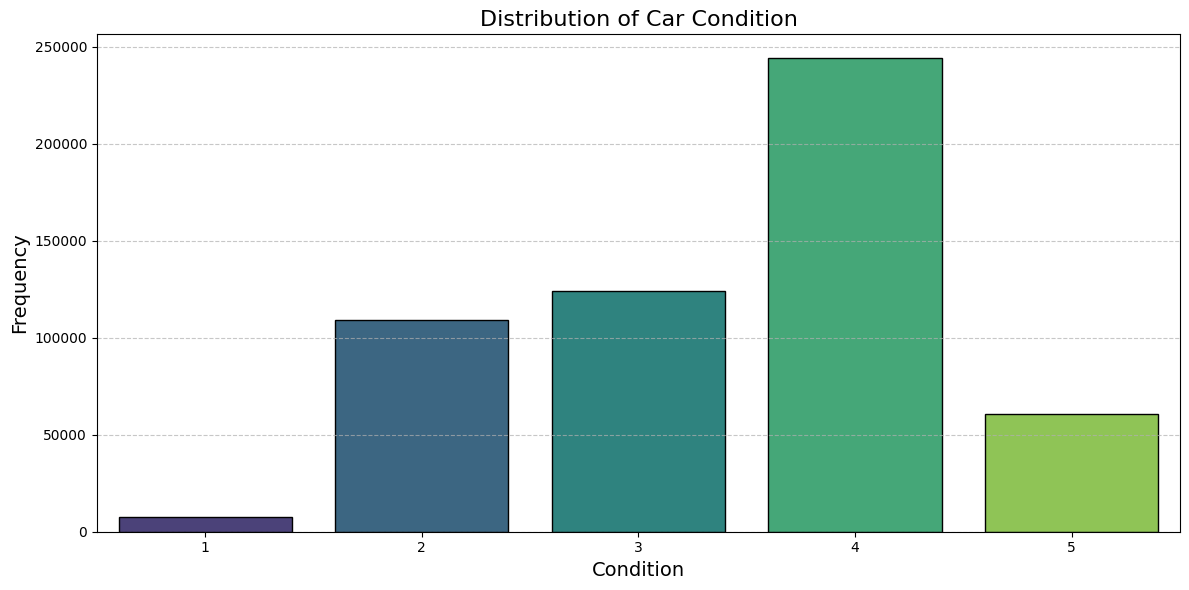

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='condition', data=df, palette='viridis', edgecolor='black')
plt.title('Distribution of Car Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

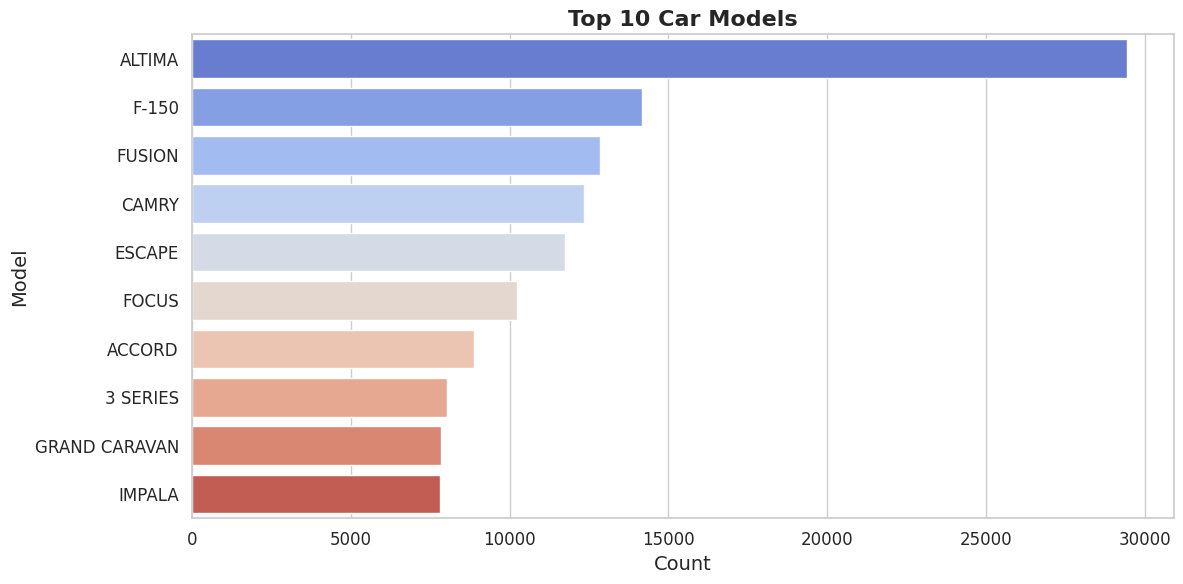

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.countplot(y='model', data=df, order=df['model'].value_counts().index[:10], palette='coolwarm')
plt.title('Top 10 Car Models', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

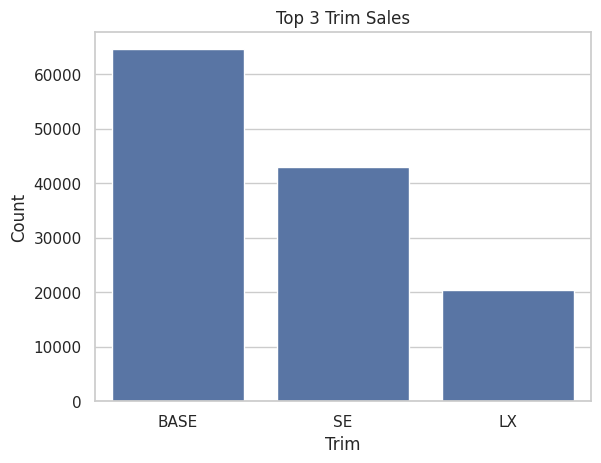

In [ ]:
top_3_trims = df['trim'].value_counts().nlargest(3)

sns.barplot(
    x=top_3_trims.index,
    y=top_3_trims.values
)
plt.title('Top 3 Trim Sales')
plt.xlabel('Trim')
plt.ylabel('Count')
plt.show()


*What is the shape of cars on the market?*

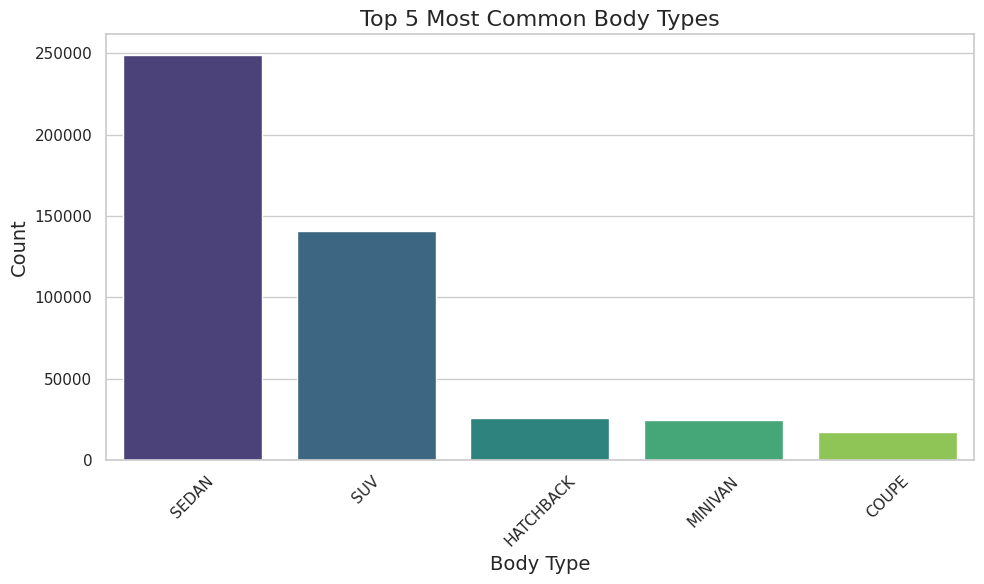

In [ ]:
top_5_body = df['body'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_body.index, y=top_5_body.values, palette='viridis')
plt.title('Top 5 Most Common Body Types', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

*What are the months in which the sale is most frequent?*

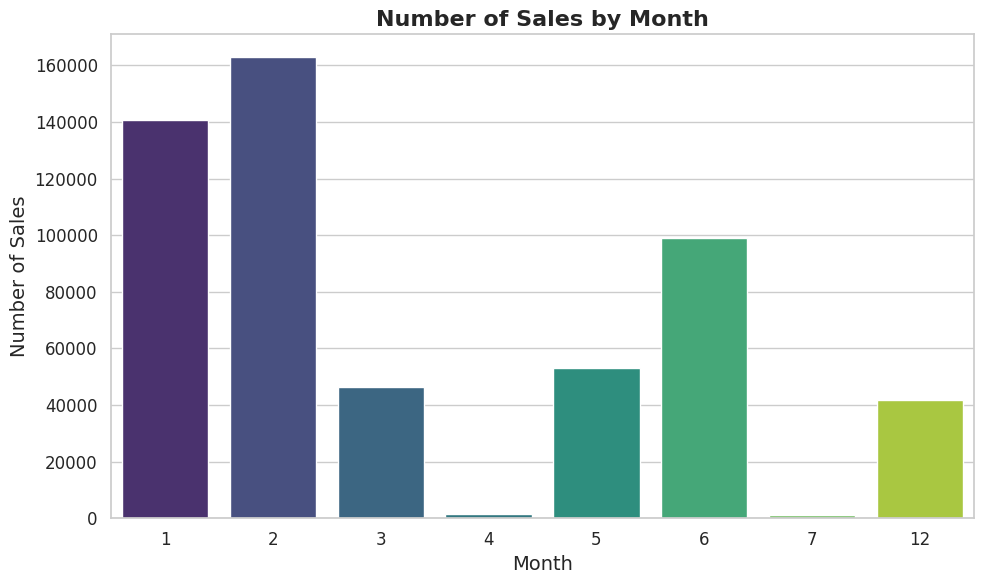

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(
    x='saledate_month',
    data=df,
    palette='viridis'
)

plt.title('Number of Sales by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


*What year is the best-selling car?*

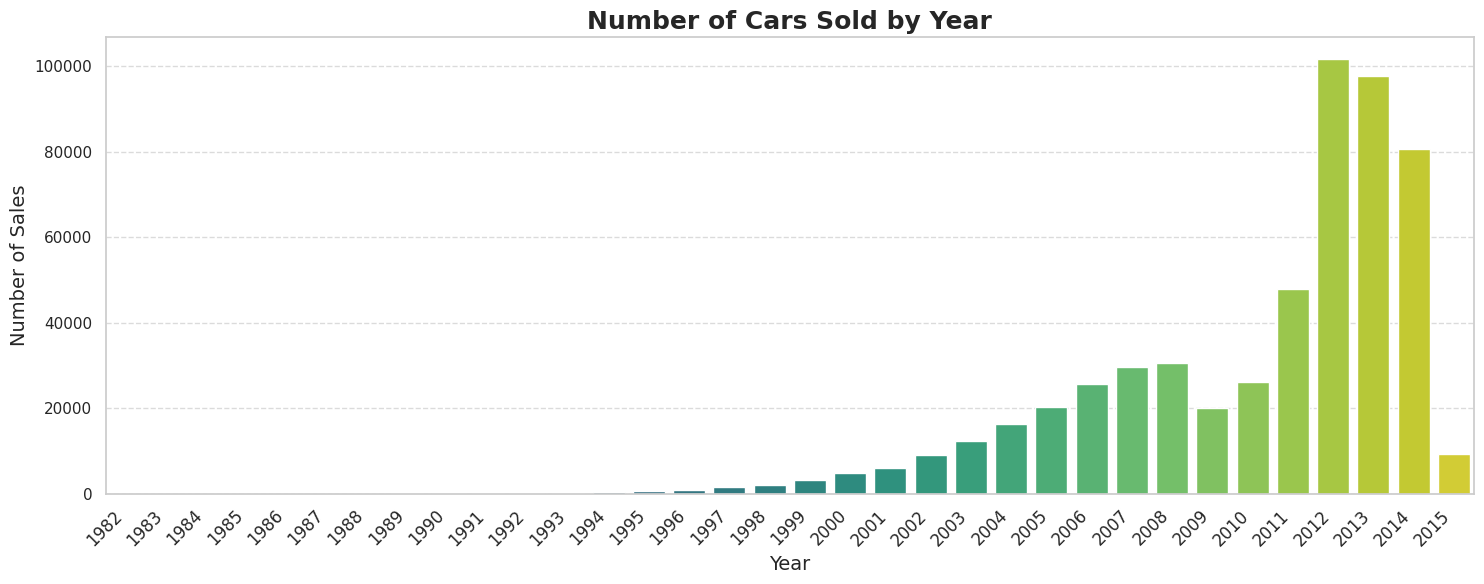

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='year', data=df, palette='viridis')

plt.title('Number of Cars Sold by Year', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*What are the best-selling brands on the market?*

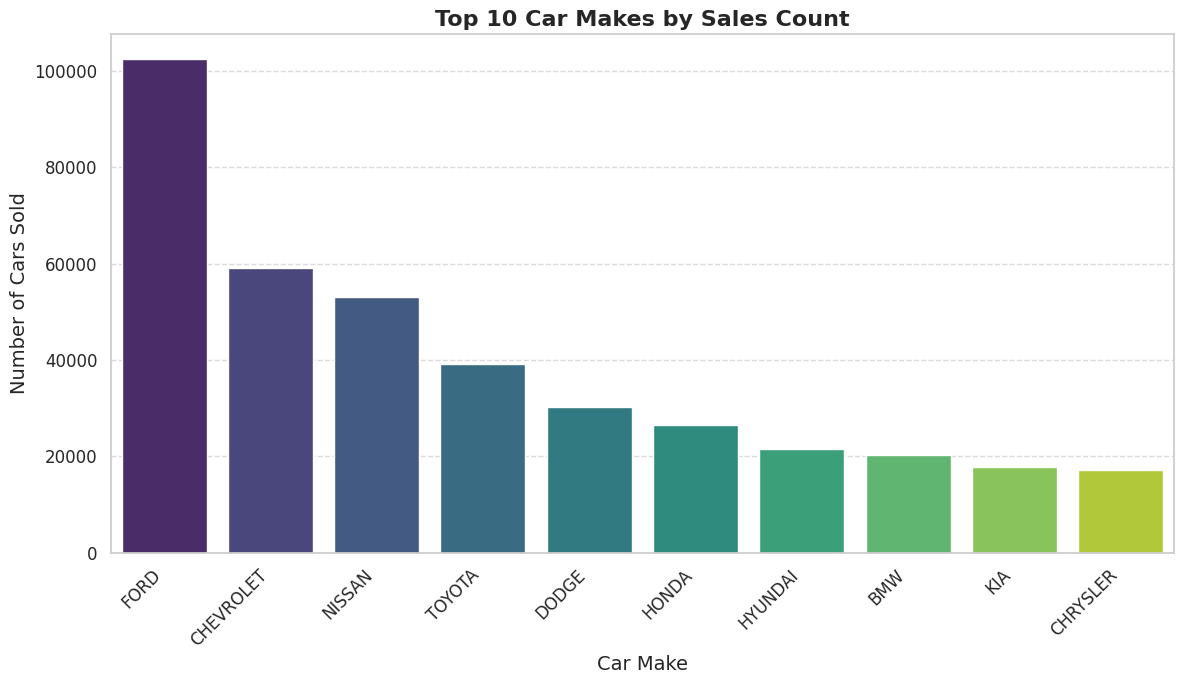

In [ ]:
top_makes = df['make'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Car Makes by Sales Count', fontsize=16, fontweight='bold')
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

*What is the average price in the market?*

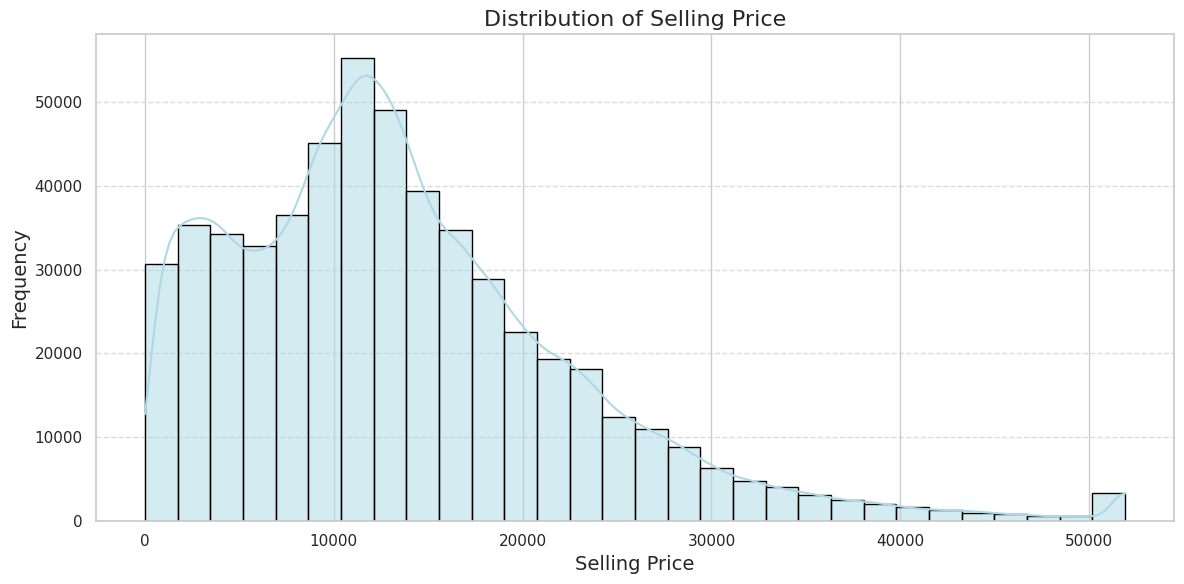

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['sellingprice'], bins=30, kde=True, color='lightblue', edgecolor='black')
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Are most cars on the market automatic?*

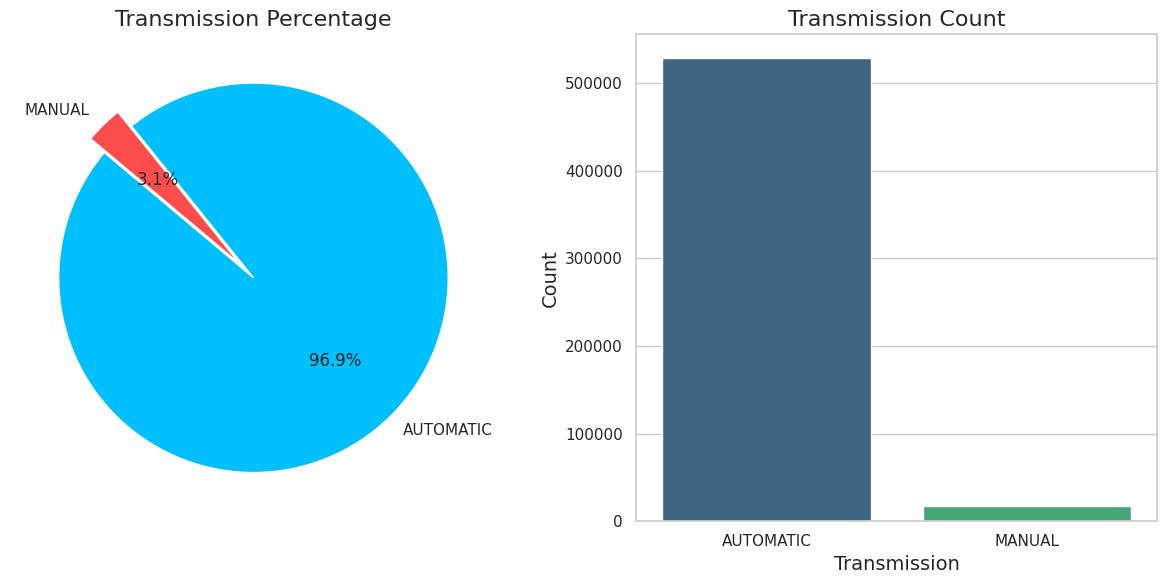

In [ ]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(1, 2)

transmission = df['transmission'].value_counts()

axes[0].pie(transmission,
             labels=transmission.index,
             autopct="%1.1f%%",
             explode=[0, 0.1],
             colors=['#00bfff', '#ff4d4d'],
             startangle=140)
axes[0].set_title('Transmission Percentage', fontsize=16)

sns.countplot(data=df, x='transmission', ax=axes[1], palette='viridis')
axes[1].set_title('Transmission Count', fontsize=16)
axes[1].set_xlabel('Transmission', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

*What colors do buyers prerfer?*

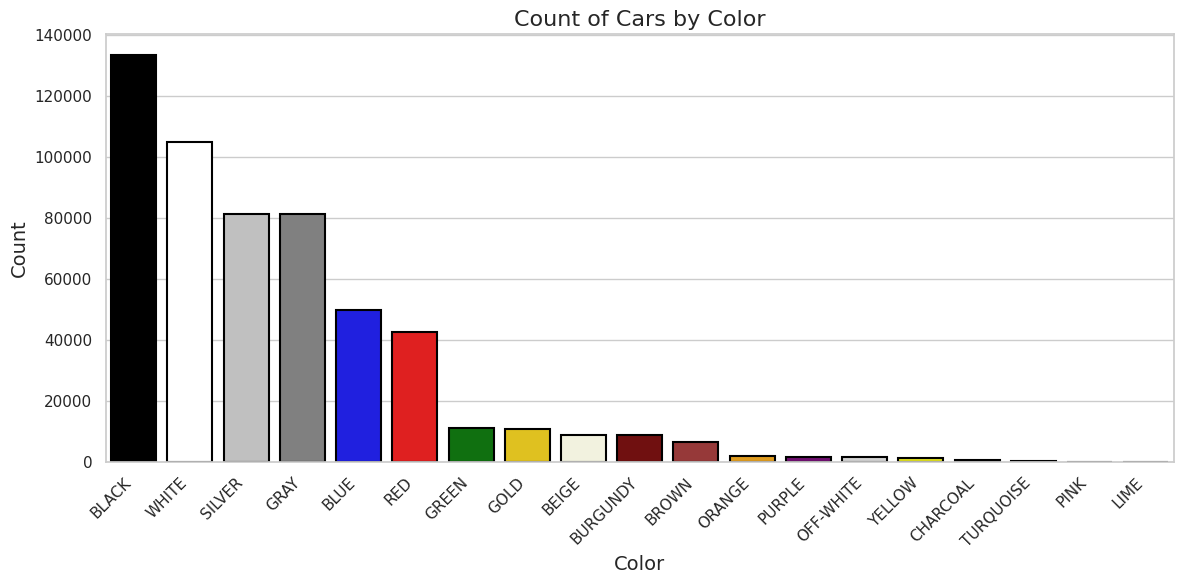

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

custom_palette = {
    'BLACK': 'black',
    'WHITE': 'white',
    'SILVER': 'silver',
    'GRAY': 'gray',
    'BLUE': 'blue',
    'RED': 'red',
    'GOLD': 'gold',
    'GREEN': 'green',
    'BEIGE': 'beige',
    'BURGUNDY': 'maroon',
    'BROWN': 'brown',
    'ORANGE': 'orange',
    'PURPLE': 'purple',
    'OFF-WHITE': 'lightgray',
    'YELLOW': 'yellow',
    'CHARCOAL': 'dimgray',
    'TURQUOISE': 'turquoise',
    'PINK': 'pink',
    'LIME': 'lime'
}

color_counts = df['color'].value_counts().reset_index()
color_counts.columns = ['color', 'count']

bar_plot = sns.barplot(x='color', y='count', data=color_counts, palette=custom_palette)
plt.xticks(rotation=45, ha='right')

for bar in bar_plot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
plt.title('Count of Cars by Color', fontsize=16)
plt.xlabel('Color', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


*Which brands have the most models?*

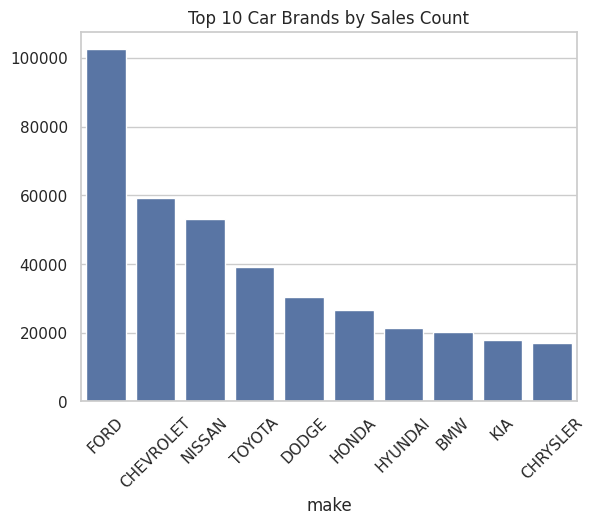

In [ ]:
top_10 = df['make'].value_counts().head(10)

sns.barplot(x=top_10.index, y=top_10.values)
plt.xticks(rotation=45)
plt.title('Top 10 Car Brands by Sales Count')
plt.show()


## Multivariant Analysis

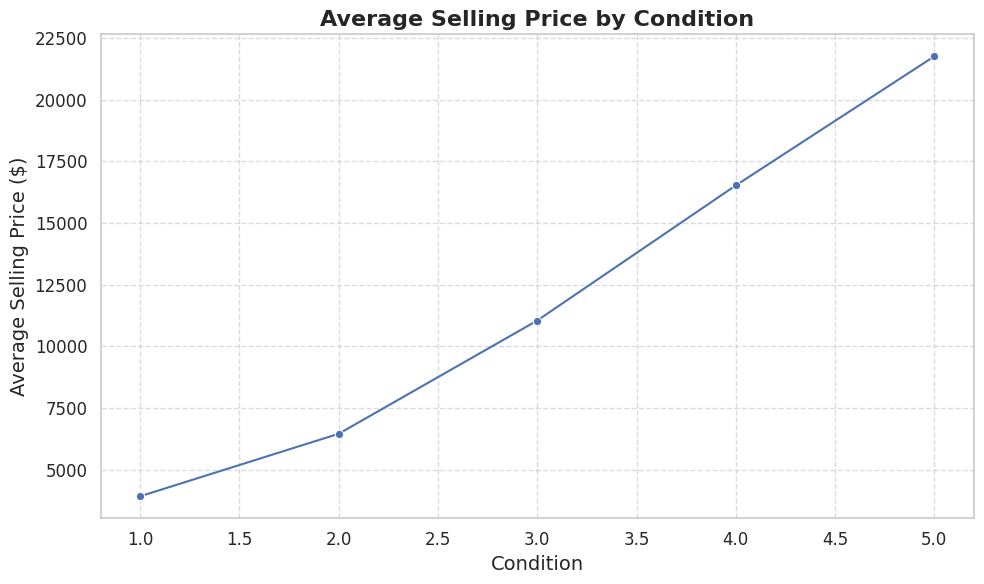

In [ ]:
avg_price_by_condition = (
    df.groupby('condition')['sellingprice']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=avg_price_by_condition,
    x='condition',
    y='sellingprice',
    marker='o'
)

plt.title('Average Selling Price by Condition', fontsize=16, fontweight='bold')
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Selling Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


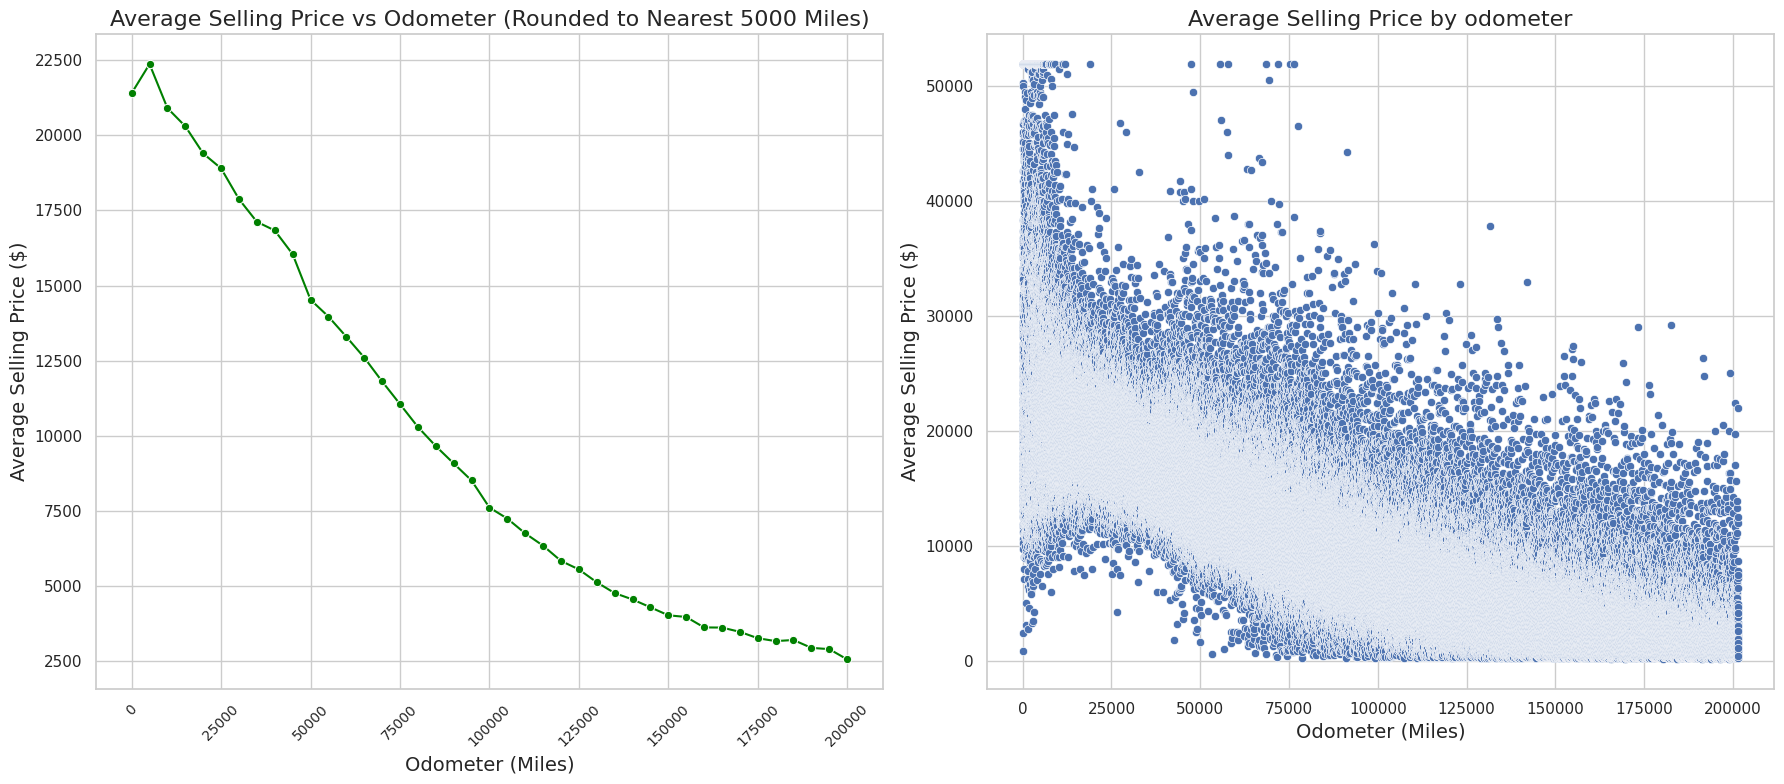

In [ ]:
newdata = df[['sellingprice', 'odometer']]
newdata['odometer_group'] = (newdata['odometer'] // 5000) * 5000
avg_price_by_group = newdata.groupby('odometer_group')['sellingprice'].mean().reset_index()

avg_price_by_mileage = df.groupby('odometer')['sellingprice'].mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.lineplot(data=avg_price_by_group, x='odometer_group', y='sellingprice', marker='o', color='green', ax=axs[0])
axs[0].set_title('Average Selling Price vs Odometer (Rounded to Nearest 5000 Miles)', fontsize=16)
axs[0].set_xlabel('Odometer (Miles)', fontsize=14)
axs[0].set_ylabel('Average Selling Price ($)', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=10)

sns.scatterplot(data=avg_price_by_mileage, x='odometer', y='sellingprice', ax=axs[1])
axs[1].set_title('Average Selling Price by odometer', fontsize=16)
axs[1].set_xlabel('Odometer (Miles)', fontsize=14)
axs[1].set_ylabel('Average Selling Price ($)', fontsize=14)

plt.tight_layout()
plt.show()

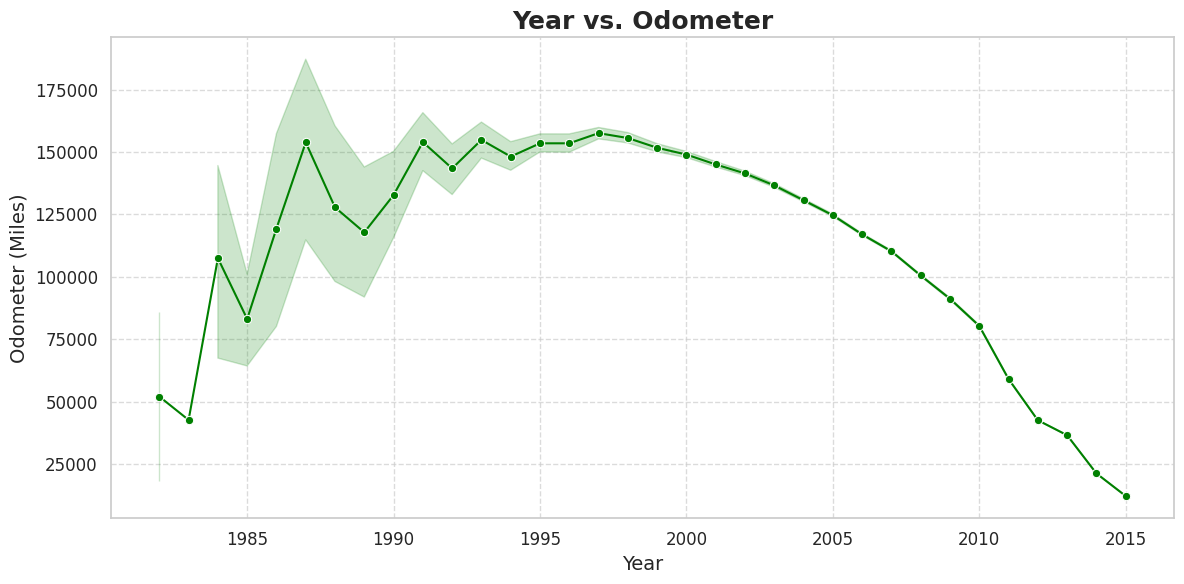

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='odometer', color='green', marker='o')

plt.title('Year vs. Odometer', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Odometer (Miles)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


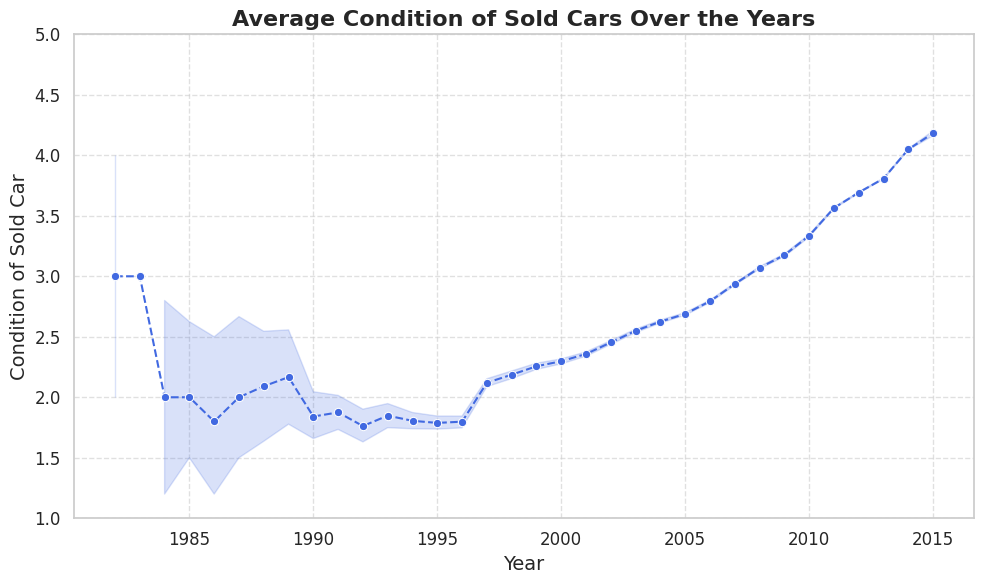

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='year', y='condition', data=df, marker='o', linestyle='--', color='royalblue')

plt.title('Average Condition of Sold Cars Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Condition of Sold Car', fontsize=14)
plt.ylim(1, 5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

*Who are the most profitable sellers?*

In [ ]:
top_sellers = df.groupby('seller')['sellingprice'].sum().nlargest(5).reset_index()
top_sellers

,seller,sellingprice
0,NISSAN INFINITI LT,487781231.0
1,FORD MOTOR CREDIT COMPANY LLC,339791375.0
2,THE HERTZ CORPORATION,249326189.0
3,AVIS CORPORATION,203039880.0
4,FINANCIAL SERVICES REMARKETING LEASE,171896325.0


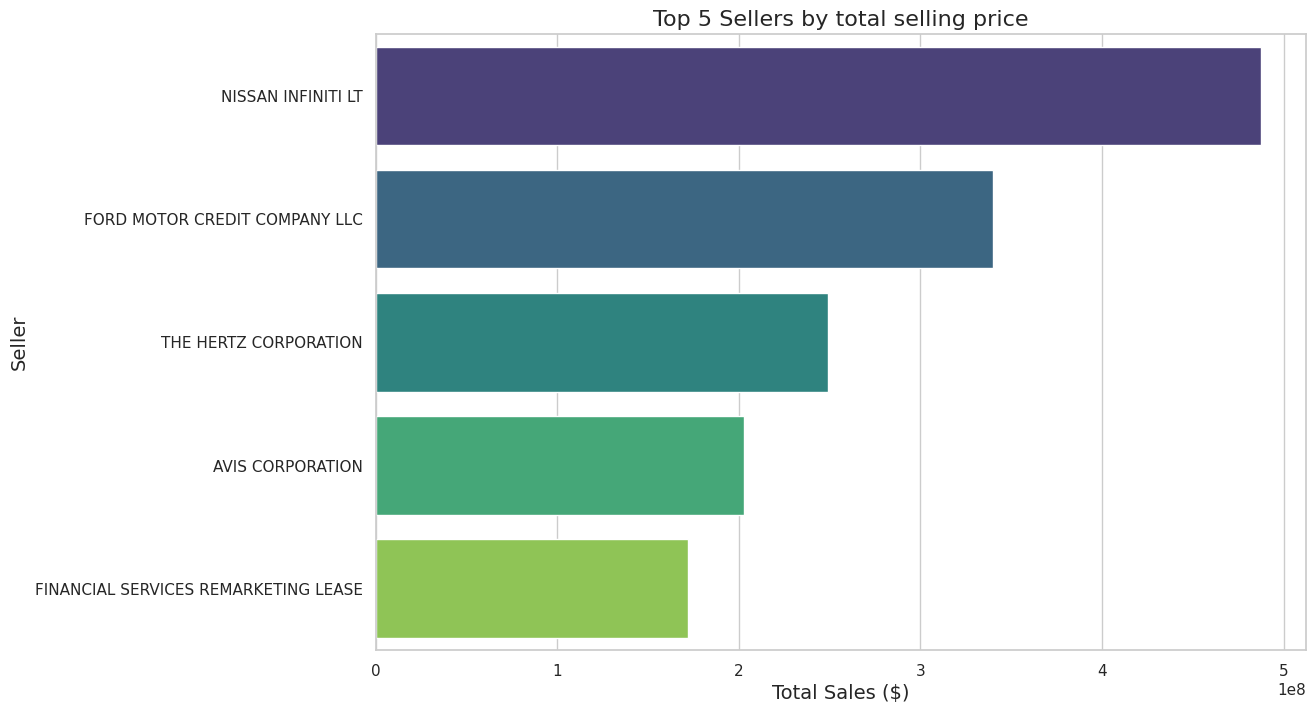

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sellers, x='sellingprice', y='seller', palette='viridis')
plt.title('Top 5 Sellers by total selling price', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Seller', fontsize=14)
plt.show()

# Modeling

In [ ]:
df2=pd.read_csv('/content/cleaned_data.csv')
df2.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate_year,saledate_month,saledate_day
0,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5,16639.0,WHITE,BLACK,KIA MOTORS AMERICA INC,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
1,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5,9393.0,WHITE,BEIGE,KIA MOTORS AMERICA INC,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014,12,16
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,CALIFORNIA,4,1331.0,GRAY,BLACK,FINANCIAL SERVICES REMARKETING LEASE,31900.0,30000.0,2015-01-14 20:30:00+00:00,2015,1,14
3,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,CALIFORNIA,4,14282.0,WHITE,BLACK,VOLVO NA REP WORLD OMNI,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015,1,28
4,2014,BMW,6 SERIES GRAN COUPE,650I,SEDAN,AUTOMATIC,CALIFORNIA,4,2641.0,GRAY,BLACK,FINANCIAL SERVICES REMARKETING LEASE,66000.0,51900.0,2014-12-18 04:30:00+00:00,2014,12,18


In [ ]:
pd.crosstab(df2['color'], df2['interior'])

interior,BEIGE,BLACK,BLUE,BROWN,BURGUNDY,GOLD,GRAY,GREEN,OFF-WHITE,ORANGE,PURPLE,RED,SILVER,TAN,WHITE,YELLOW
color,,,,,,,,,,,,,,,,
BEIGE,2564,2041,5,271,1,14,1442,2,0,2,1,4,5,2528,3,0
BLACK,12522,75308,125,2584,62,68,32356,49,274,38,77,460,166,9329,52,3
BLUE,5445,19688,385,590,5,26,19662,13,27,6,23,23,118,3808,24,0
BROWN,1621,2143,3,587,7,9,913,2,0,8,3,3,9,1282,3,0
BURGUNDY,1745,2994,1,147,16,11,2344,4,0,2,20,6,11,1400,5,0
CHARCOAL,41,268,0,9,1,0,121,0,0,1,0,2,0,27,0,0
GOLD,3877,2151,5,333,3,94,1457,1,0,1,1,6,11,2955,0,1
GRAY,4729,42834,106,729,14,6,29662,35,36,14,42,171,172,2697,26,0
GREEN,2300,2719,17,274,0,7,3638,47,0,1,2,0,12,1878,6,0


<Axes: >

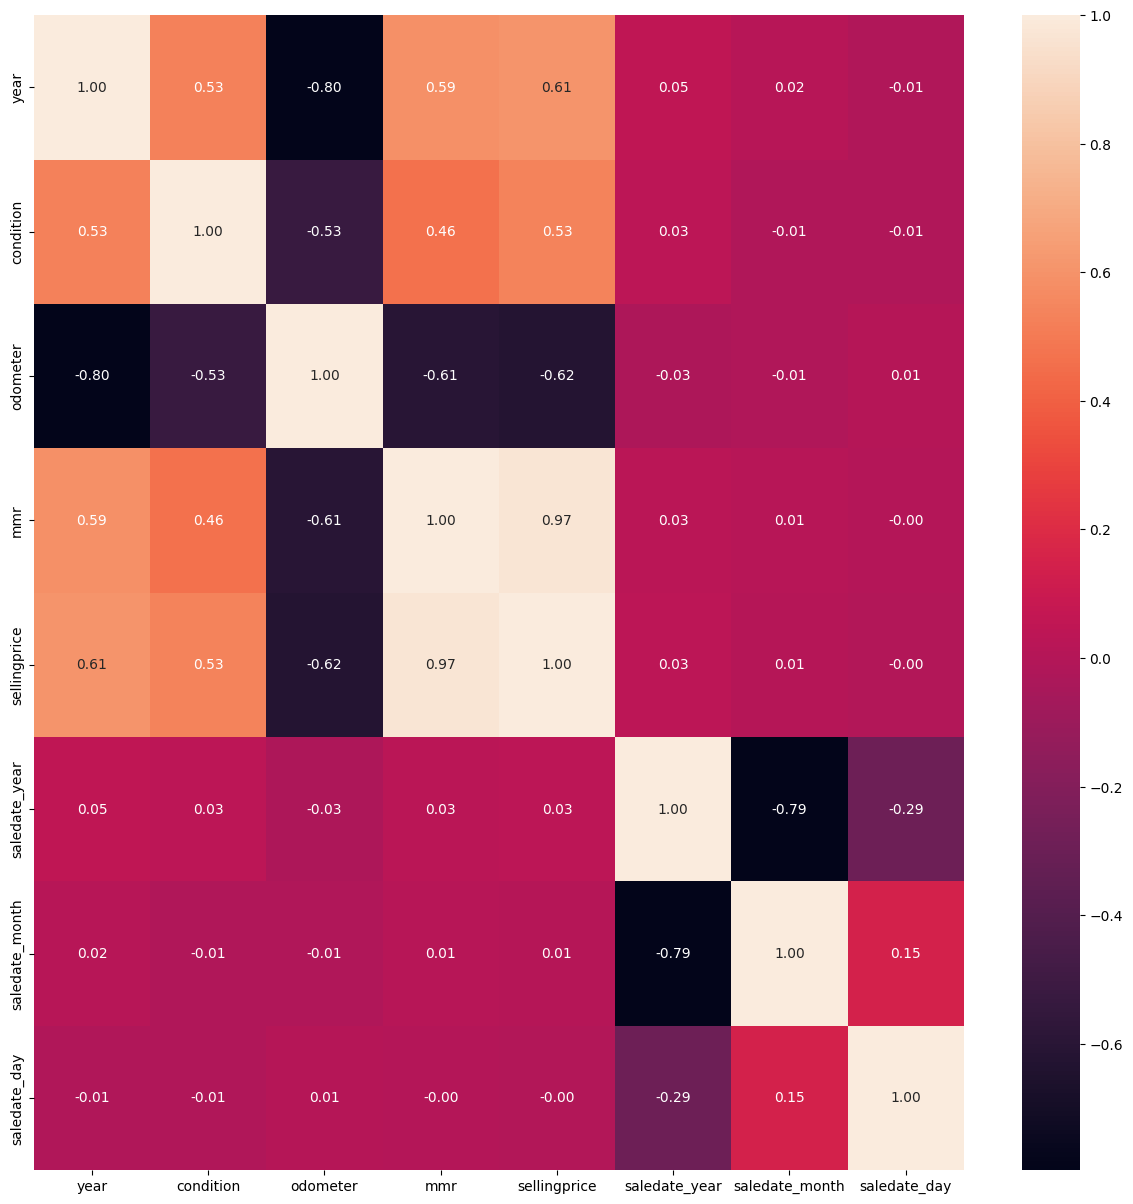

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df2.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt='.2f')

In [ ]:
df2.trim.nunique()

1843

In [ ]:
df2['transmission'].value_counts(normalize=True)

,proportion
transmission,
AUTOMATIC,0.96883
MANUAL,0.03117


In [ ]:
DROP_COLS = [
    'sellingprice',
    'mmr',
    'saledate',
    'saledate_year',
    'saledate_month',
    'saledate_day',
    'seller',
    'interior',
]

X = df2.drop(columns=DROP_COLS)
y = df2['sellingprice']

In [ ]:
X.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color
0,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5,16639.0,WHITE
1,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5,9393.0,WHITE
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,CALIFORNIA,4,1331.0,GRAY
3,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,CALIFORNIA,4,14282.0,WHITE
4,2014,BMW,6 SERIES GRAN COUPE,650I,SEDAN,AUTOMATIC,CALIFORNIA,4,2641.0,GRAY


In [ ]:
!pip install category_encoders
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

num_features = ['year', 'odometer', 'condition']
cat_features = ['make', 'model', 'body', 'transmission', 'state', 'color','trim']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', TargetEncoder(), cat_features)
    ]
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
models = {
    "Linear": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=3,
        scoring='r2'
    )
    print(f"{name}: {scores.mean():.4f}")

Linear: 0.7774
DecisionTree: 0.9102
RandomForest: 0.9524
XGBoost: 0.9429


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

dt_params = {
    'model__max_depth': [5, 10, 20],
    'model__min_samples_leaf': [10, 50, 100]
}

dt_grid = GridSearchCV(
    dt_pipe,
    param_grid=dt_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer',
                                                                          'condition']),
                                                                        ('cat',
                                                                         TargetEncoder(),
                                                                         ['make',
                                                                          'model',
                                                                          'body',
                                                                          'transmission',
                                                                          'state',
                                                                          'color',
                                                                          'trim'])])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10, 20],
                         'model__min_samples_leaf': [10, 50, 100]},
             scoring='r2')

In [ ]:
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        random_state=42,
        n_jobs=2
    ))
])

rf_params = {
    'model__n_estimators': [200],
    'model__max_depth': [20, None],
    'model__min_samples_leaf': [5]
}

rf_grid = GridSearchCV(
    rf_pipe,
    param_grid=rf_params,
    cv=3,
    scoring='r2',
    n_jobs=1
)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer',
                                                                          'condition']),
                                                                        ('cat',
                                                                         TargetEncoder(),
                                                                         ['make',
                                                                          'model',
                                                                          'body',
                                                                          'transmission',
                                                                          'state',
                                                                          'color',
                                                                          'trim'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=2,
                                                              random_state=42))]),
             n_jobs=1,
             param_grid={'model__max_depth': [20, None],
                         'model__min_samples_leaf': [5],
                         'model__n_estimators': [200]},
             scoring='r2')

In [ ]:
xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        device='cuda',          # GPU
        random_state=42,
        eval_metric='rmse'
    ))
])

xgb_params = {
    'model__n_estimators': [300, 500],
    'model__max_depth': [6, 8],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8]
}

xgb_grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=xgb_params,
    cv=3,
    scoring='r2',
    n_jobs=1
)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer',
                                                                          'condition']),
                                                                        ('cat',
                                                                         TargetEncoder(),
                                                                         ['make',
                                                                          'model',
                                                                          'body',
                                                                          'transmission',
                                                                          'state',
                                                                          'color',
                                                                          'trim'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     c...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [6, 8],
                         'model__n_estimators': [300, 500],
                         'model__subsample': [0.8]},
             scoring='r2')

In [ ]:
print("DT CV R2:", dt_grid.best_score_)
print("RF CV R2:", rf_grid.best_score_)
print("XGB CV R2:", xgb_grid.best_score_)

DT CV R2: 0.9329875733872186
RF CV R2: 0.9490140653245925
XGB CV R2: 0.9607174035444735


In [ ]:
best_dt  = dt_grid.best_estimator_
print(best_dt)
best_rf  = rf_grid.best_estimator_
print(best_rf)
best_xgb = xgb_grid.best_estimator_
print(best_xgb)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer',
                                                   'condition']),
                                                 ('cat', TargetEncoder(),
                                                  ['make', 'model', 'body',
                                                   'transmission', 'state',
                                                   'color', 'trim'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=20, min_samples_leaf=10,
                                       random_state=42))])
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer',
                                                   'condition']),
                                                 ('c

In [ ]:
y_pred_dt  = best_dt.predict(X_test)
y_pred_rf  = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

results = []

results.append({
    "Model": "Decision Tree",
    "R2": r2_score(y_test, y_pred_dt),
    "MAE": mean_absolute_error(y_test, y_pred_dt)
})

results.append({
    "Model": "Random Forest",
    "R2": r2_score(y_test, y_pred_rf),
    "MAE": mean_absolute_error(y_test, y_pred_rf)
})

results.append({
    "Model": "XGBoost",
    "R2": r2_score(y_test, y_pred_xgb),
    "MAE": mean_absolute_error(y_test, y_pred_xgb)
})

results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,R2,MAE
0,Decision Tree,0.940066,1413.528187
1,Random Forest,0.954829,1215.212767
2,XGBoost,0.962439,1133.276580


In [ ]:
y_train_pred = best_xgb.predict(X_train)
print("== XGB ==")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test  R2:", r2_score(y_test, y_pred_xgb))

== XGB ==
Train R2: 0.9703847143583179
Test  R2: 0.9624392076619998


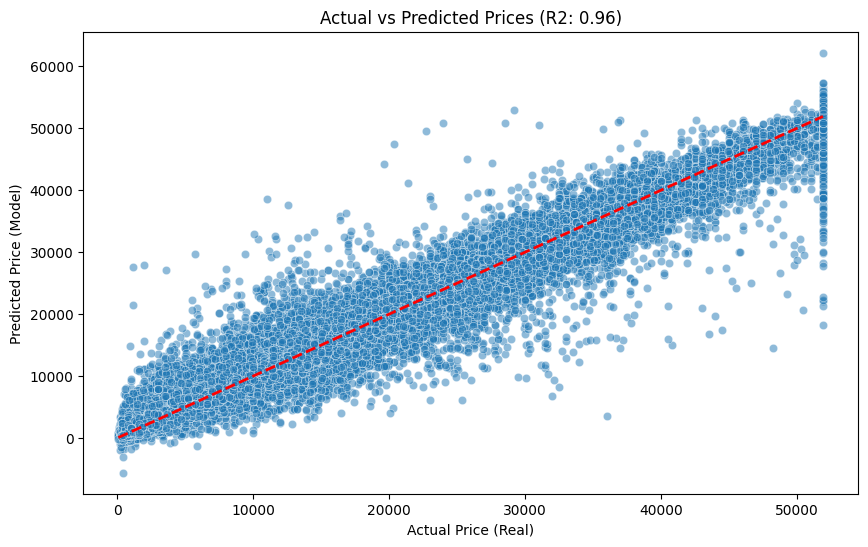

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = xgb_grid.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Price (Real)')
plt.ylabel('Predicted Price (Model)')
plt.title('Actual vs Predicted Prices (R2: 0.96)')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae  = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred_xgb)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.4f}")

MAE  : 1133.28
RMSE : 1787.93
R2   : 0.9624


In [ ]:
importances = best_xgb.named_steps['model'].feature_importances_
feature_names = best_xgb.named_steps['preprocessor'].get_feature_names_out()

fi = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi.head(10)


,Feature,Importance
4,cat__model,0.360926
1,num__odometer,0.228223
0,num__year,0.164695
9,cat__trim,0.072608
2,num__condition,0.059127
5,cat__body,0.052550
3,cat__make,0.044699
6,cat__transmission,0.008059
7,cat__state,0.005304
8,cat__color,0.003808


In [ ]:
import joblib

joblib.dump(best_xgb, 'car_price_model.pkl')

print("Model saved.")

loaded_model = joblib.load('car_price_model.pkl')
sample_pred = loaded_model.predict(X_test.iloc[0:1])
print(f"Prediction from loaded model: {sample_pred[0]}")

Model saved.
Prediction from loaded model: 5424.79296875
